### Baseline Analysis

1. check if monthly stock returns are stationanry

2. check covariates are stationary

3. get historical quantile (Baseline)

In [1]:
import pandas as pd
import numpy as np

import yfinance as yf

import requests
from datetime import datetime
import scipy.stats as stats
import math
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from statsmodels.tsa.stattools import adfuller
import seaborn as sns

Load Data

In [2]:
url = "https://raw.githubusercontent.com/TobiPfeiffersGitHub/BSExNovartis_Thesis/main/Data/monthly_data.csv"
response = requests.get(url)

if response.status_code == 200:
    with open("monthly_data.csv", "wb") as file:
        file.write(response.content)
    print("File downloaded successfully.")
else:
    print("Failed to download the file.")

# Load the file into a DataFrame
data = pd.read_csv("monthly_data.csv")

# Perform operations on the DataFrame as needed
# For example, print the first few rows
data.head(5)

File downloaded successfully.


,Unnamed: 0,Date,unemployment_rate,inflation_rate,treasury_yield,Monthly Real GDP Index,GDP_growth,SP500_return,ABBV,AZN,BMY,JNJ,LLY,MRK,NVO,NVS,PFE,ROG
0,0,2000-01-01,4.0,169.3,NaN,12870.47162,-1.066967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2000-02-01,4.1,170.0,6.661000,12934.38121,0.496560,-1.522563,NaN,-12.828964,-13.228004,-16.339821,-11.121498,-21.701151,2.220031,3.838386,-11.226228,54.440789
2,2,2000-03-01,4.0,171.0,6.519500,13000.50928,0.511258,9.413333,NaN,22.264136,-0.218329,-2.079067,5.804243,0.913712,8.390897,6.420237,14.101954,6.922258
3,3,2000-04-01,3.8,170.9,6.256522,13173.13041,1.327803,-3.266805,NaN,5.567379,-8.205683,17.437698,23.153694,12.400712,-0.097663,2.559423,15.213674,7.370518
4,4,2000-05-01,4.0,171.2,5.990526,13149.18201,-0.181797,-1.572223,NaN,-0.148357,5.395746,8.484832,-1.296597,7.374072,20.863985,5.169310,5.638019,-8.163265


In [3]:
# drop the NA's from the data frame

data.dropna(subset=['AZN', 'BMY', 'JNJ', 'LLY', 'MRK', 'NVO', 'NVS', 'PFE', 'ROG'], inplace=True)
data = data.reset_index()
data

,index,Unnamed: 0,Date,unemployment_rate,inflation_rate,treasury_yield,Monthly Real GDP Index,GDP_growth,SP500_return,ABBV,AZN,BMY,JNJ,LLY,MRK,NVO,NVS,PFE,ROG
0,1,1,2000-02-01,4.1,170.000,6.661000,12934.38121,0.496560,-1.522563,NaN,-12.828964,-13.228004,-16.339821,-11.121498,-21.701151,2.220031,3.838386,-11.226228,54.440789
1,2,2,2000-03-01,4.0,171.000,6.519500,13000.50928,0.511258,9.413333,NaN,22.264136,-0.218329,-2.079067,5.804243,0.913712,8.390897,6.420237,14.101954,6.922258
2,3,3,2000-04-01,3.8,170.900,6.256522,13173.13041,1.327803,-3.266805,NaN,5.567379,-8.205683,17.437698,23.153694,12.400712,-0.097663,2.559423,15.213674,7.370518
3,4,4,2000-05-01,4.0,171.200,5.990526,13149.18201,-0.181797,-1.572223,NaN,-0.148357,5.395746,8.484832,-1.296597,7.374072,20.863985,5.169310,5.638019,-8.163265
4,5,5,2000-06-01,4.0,172.200,6.440455,13189.36127,0.305565,1.728613,NaN,10.549735,5.788826,14.239888,31.641749,3.078671,2.813690,8.474599,8.076012,13.131313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,276,276,2023-01-01,3.4,300.536,3.616190,20283.65522,0.390254,6.776820,-8.576205,-3.584079,0.972908,-7.489384,-5.928822,-2.549213,2.541749,-0.110227,-13.817335,16.968326
276,277,277,2023-02-01,3.6,301.648,3.531500,20193.96427,-0.442183,-2.514271,5.152609,-0.290649,-4.328217,-6.217115,-9.568502,-1.089288,1.592445,-7.172811,-7.286115,5.451681
277,278,278,2023-03-01,3.5,301.808,3.746842,NaN,NaN,3.313488,3.554254,8.035329,0.507544,1.862736,10.703390,0.141189,12.873250,9.367574,0.566924,11.025813
278,279,279,2023-04-01,3.4,302.918,3.663043,NaN,NaN,1.985238,-5.176628,5.489119,-3.664707,5.612908,15.269915,9.289214,5.836894,16.334413,-4.681371,-1.517467


In [4]:
data = data.drop(columns=['index', 'Unnamed: 0', 'Monthly Real GDP Index'], axis=1)
data

,Date,unemployment_rate,inflation_rate,treasury_yield,GDP_growth,SP500_return,ABBV,AZN,BMY,JNJ,LLY,MRK,NVO,NVS,PFE,ROG
0,2000-02-01,4.1,170.000,6.661000,0.496560,-1.522563,NaN,-12.828964,-13.228004,-16.339821,-11.121498,-21.701151,2.220031,3.838386,-11.226228,54.440789
1,2000-03-01,4.0,171.000,6.519500,0.511258,9.413333,NaN,22.264136,-0.218329,-2.079067,5.804243,0.913712,8.390897,6.420237,14.101954,6.922258
2,2000-04-01,3.8,170.900,6.256522,1.327803,-3.266805,NaN,5.567379,-8.205683,17.437698,23.153694,12.400712,-0.097663,2.559423,15.213674,7.370518
3,2000-05-01,4.0,171.200,5.990526,-0.181797,-1.572223,NaN,-0.148357,5.395746,8.484832,-1.296597,7.374072,20.863985,5.169310,5.638019,-8.163265
4,2000-06-01,4.0,172.200,6.440455,0.305565,1.728613,NaN,10.549735,5.788826,14.239888,31.641749,3.078671,2.813690,8.474599,8.076012,13.131313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,2023-01-01,3.4,300.536,3.616190,0.390254,6.776820,-8.576205,-3.584079,0.972908,-7.489384,-5.928822,-2.549213,2.541749,-0.110227,-13.817335,16.968326
276,2023-02-01,3.6,301.648,3.531500,-0.442183,-2.514271,5.152609,-0.290649,-4.328217,-6.217115,-9.568502,-1.089288,1.592445,-7.172811,-7.286115,5.451681
277,2023-03-01,3.5,301.808,3.746842,NaN,3.313488,3.554254,8.035329,0.507544,1.862736,10.703390,0.141189,12.873250,9.367574,0.566924,11.025813
278,2023-04-01,3.4,302.918,3.663043,NaN,1.985238,-5.176628,5.489119,-3.664707,5.612908,15.269915,9.289214,5.836894,16.334413,-4.681371,-1.517467


This function takes a list of column names and returns a table of summary statistics

In [5]:
def sanity_check(df, ticker):
  """
  - stationarity
  - mean / meadian 
  - std / volatility
  - skewness / kurtosis
  """
  adf = adfuller(df[str(ticker)])
  adf_stat = adf[0]
  p_value = adf[1]
  if p_value < 0.05:
    stationarity = f"{adf_stat:.3f} (statio.)"
  else:
    stationarity = f"{adf_stat:.3f} (NOT statio.)"
  mean = df[str(ticker)].mean()
  median = df[str(ticker)].median()
  std = df[str(ticker)].std()
  # volatility is complex bc of the differing time horizions
  skew = stats.skew(df[str(ticker)])
  kurt = stats.kurtosis(df[str(ticker)]) 

  sanity = pd.DataFrame([stationarity, round(mean, 4), round(median,4), round(std,4), 
                         round(skew,4), round(kurt,4)], columns=[str(ticker)],
                         index=['Stationarity', 'Mean', 'Median', 'Standard Deviation',
                                'Skewness', 'Kurtosis'])
  return sanity

1. Summary Statistics for Stock Returns

In [6]:
data.isna().sum()

Date                   0
unemployment_rate      0
inflation_rate         1
treasury_yield         0
GDP_growth             3
SP500_return           0
ABBV                 157
AZN                    0
BMY                    0
JNJ                    0
LLY                    0
MRK                    0
NVO                    0
NVS                    0
PFE                    0
ROG                    0
dtype: int64

In [7]:
tickers = ['NVS', 'AZN', 'BMY', 'JNJ', 'LLY', 'MRK', 'NVO', 'PFE', 'ROG']
dfs = []

# note that ABBV had thier IPO in 2013 and is therefore exuded from this list

for t in tickers:
  #dta = get_custom_data(t, "2022-12-1", "2023-04-18", "1d", True)
  df_sum = sanity_check(data, t)
  dfs.append(df_sum)

summary_stats = pd.concat(dfs, axis=1)
summary_stats 

,NVS,AZN,BMY,JNJ,LLY,MRK,NVO,PFE,ROG
Stationarity,-16.964 (statio.),-17.951 (statio.),-18.670 (statio.),-14.411 (statio.),-11.204 (statio.),-18.414 (statio.),-8.567 (statio.),-13.379 (statio.),-18.870 (statio.)
Mean,0.8363,1.0187,0.565,0.7875,1.1723,0.683,1.8922,0.503,1.4972
Median,0.8694,0.3153,0.7844,0.7349,0.8382,0.6367,2.1092,0.6078,1.1729
Standard Deviation,5.1468,6.787,7.0653,4.8108,7.2741,6.8761,7.0161,6.0962,12.0454
Skewness,-0.0662,0.3114,-0.43,-0.1579,0.1668,-0.2211,-0.2169,0.1482,0.0492
Kurtosis,0.2251,0.7201,1.3977,1.1464,2.432,1.2376,1.8545,0.5027,2.5331


In [8]:
# now let's look at Abbvie

ABBV = data[data['ABBV'].notna()]
ABBV

,Date,unemployment_rate,inflation_rate,treasury_yield,GDP_growth,SP500_return,ABBV,AZN,BMY,JNJ,LLY,MRK,NVO,NVS,PFE,ROG
157,2013-03-01,7.5,232.282,1.984211,0.397212,3.337507,10.455062,14.582205,11.414669,7.978126,4.851792,3.440210,-7.714279,9.067089,5.443922,-0.188640
158,2013-04-01,7.6,231.797,1.957500,0.085246,2.374537,12.922975,3.881563,-3.568848,4.538222,-2.482836,7.359867,11.497419,3.537347,0.727651,-10.457790
159,2013-05-01,7.5,231.893,1.759091,-0.190605,2.361004,-6.438455,-1.290451,16.816781,-1.231989,-4.008663,-0.638313,-8.792401,-2.711502,-6.329562,8.513136
160,2013-06-01,7.5,232.445,1.928182,0.620501,-1.853781,-3.162299,-7.707318,-2.868894,2.762464,-6.788137,-0.535372,-3.805087,-1.463219,3.722003,2.269287
161,2013-07-01,7.3,232.900,2.300000,0.210359,5.724173,10.014486,7.230424,-3.244595,8.898141,8.122938,4.655361,9.001745,1.272809,4.355584,17.540151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,2023-01-01,3.4,300.536,3.616190,0.390254,6.776820,-8.576205,-3.584079,0.972908,-7.489384,-5.928822,-2.549213,2.541749,-0.110227,-13.817335,16.968326
276,2023-02-01,3.6,301.648,3.531500,-0.442183,-2.514271,5.152609,-0.290649,-4.328217,-6.217115,-9.568502,-1.089288,1.592445,-7.172811,-7.286115,5.451681
277,2023-03-01,3.5,301.808,3.746842,NaN,3.313488,3.554254,8.035329,0.507544,1.862736,10.703390,0.141189,12.873250,9.367574,0.566924,11.025813
278,2023-04-01,3.4,302.918,3.663043,NaN,1.985238,-5.176628,5.489119,-3.664707,5.612908,15.269915,9.289214,5.836894,16.334413,-4.681371,-1.517467


In [9]:
sanity_check(ABBV, 'ABBV')

,ABBV
Stationarity,-10.019 (statio.)
Mean,1.7063
Median,1.7037
Standard Deviation,7.65
Skewness,0.0902
Kurtosis,0.3908


2. Summary Statistics of the Macro Economic Covariates

In [10]:
macros = data[['unemployment_rate', 'inflation_rate', 'treasury_yield', 'GDP_growth', 'SP500_return']]
macros

,unemployment_rate,inflation_rate,treasury_yield,GDP_growth,SP500_return
0,4.1,170.000,6.661000,0.496560,-1.522563
1,4.0,171.000,6.519500,0.511258,9.413333
2,3.8,170.900,6.256522,1.327803,-3.266805
3,4.0,171.200,5.990526,-0.181797,-1.572223
4,4.0,172.200,6.440455,0.305565,1.728613
...,...,...,...,...,...
275,3.4,300.536,3.616190,0.390254,6.776820
276,3.6,301.648,3.531500,-0.442183,-2.514271
277,3.5,301.808,3.746842,NaN,3.313488
278,3.4,302.918,3.663043,NaN,1.985238


In [11]:
macros.isna().sum()

unemployment_rate    0
inflation_rate       1
treasury_yield       0
GDP_growth           3
SP500_return         0
dtype: int64

In [12]:
macros = macros.dropna()

covariates = ['unemployment_rate', 'inflation_rate', 'treasury_yield', 'GDP_growth', 'SP500_return']
covs = []

for c in covariates:
  #dta = get_custom_data(t, "2022-12-1", "2023-04-18", "1d", True)
  df_sum = sanity_check(macros, c)
  covs.append(df_sum)

macro_summary_stats = pd.concat(covs, axis=1)
macro_summary_stats 

,unemployment_rate,inflation_rate,treasury_yield,GDP_growth,SP500_return
Stationarity,-2.859 (NOT statio.),2.043 (NOT statio.),-2.438 (NOT statio.),-9.059 (statio.),-8.798 (statio.)
Mean,5.8477,223.7821,3.2152,0.1676,0.6338
Median,5.4,226.106,3.0023,0.2104,1.1396
Standard Deviation,1.9629,31.8572,1.329,0.9766,4.5276
Skewness,1.1712,0.2378,0.2458,-3.512,-0.4142
Kurtosis,1.2538,-0.5398,-0.7125,46.1757,0.705


<AxesSubplot: >

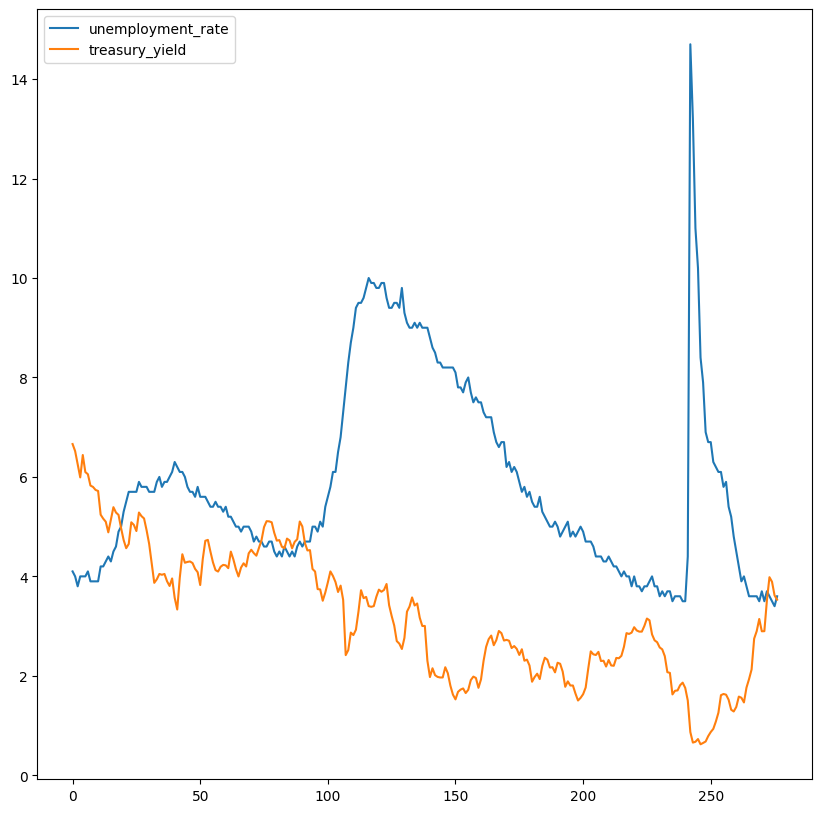

In [13]:
macros.plot(y=["unemployment_rate", 
               #"inflation_rate", 
               "treasury_yield"],
        kind="line", figsize=(10, 10))
 

In [14]:
# we now take the first differnece to get the series stationary
data['inflation_change'] = data['inflation_rate'] - data['inflation_rate'].shift(1)
data['unemp_change'] = data['unemployment_rate'] - data['unemployment_rate'].shift(1)
data['treasury_yield_change'] = data['treasury_yield'] - data['treasury_yield'].shift(1)

data

,Date,unemployment_rate,inflation_rate,treasury_yield,GDP_growth,SP500_return,ABBV,AZN,BMY,JNJ,LLY,MRK,NVO,NVS,PFE,ROG,inflation_change,unemp_change,treasury_yield_change
0,2000-02-01,4.1,170.000,6.661000,0.496560,-1.522563,NaN,-12.828964,-13.228004,-16.339821,-11.121498,-21.701151,2.220031,3.838386,-11.226228,54.440789,NaN,NaN,NaN
1,2000-03-01,4.0,171.000,6.519500,0.511258,9.413333,NaN,22.264136,-0.218329,-2.079067,5.804243,0.913712,8.390897,6.420237,14.101954,6.922258,1.000,-0.1,-0.141500
2,2000-04-01,3.8,170.900,6.256522,1.327803,-3.266805,NaN,5.567379,-8.205683,17.437698,23.153694,12.400712,-0.097663,2.559423,15.213674,7.370518,-0.100,-0.2,-0.262978
3,2000-05-01,4.0,171.200,5.990526,-0.181797,-1.572223,NaN,-0.148357,5.395746,8.484832,-1.296597,7.374072,20.863985,5.169310,5.638019,-8.163265,0.300,0.2,-0.265995
4,2000-06-01,4.0,172.200,6.440455,0.305565,1.728613,NaN,10.549735,5.788826,14.239888,31.641749,3.078671,2.813690,8.474599,8.076012,13.131313,1.000,0.0,0.449928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,2023-01-01,3.4,300.536,3.616190,0.390254,6.776820,-8.576205,-3.584079,0.972908,-7.489384,-5.928822,-2.549213,2.541749,-0.110227,-13.817335,16.968326,1.546,-0.1,-0.274810
276,2023-02-01,3.6,301.648,3.531500,-0.442183,-2.514271,5.152609,-0.290649,-4.328217,-6.217115,-9.568502,-1.089288,1.592445,-7.172811,-7.286115,5.451681,1.112,0.2,-0.084690
277,2023-03-01,3.5,301.808,3.746842,NaN,3.313488,3.554254,8.035329,0.507544,1.862736,10.703390,0.141189,12.873250,9.367574,0.566924,11.025813,0.160,-0.1,0.215342
278,2023-04-01,3.4,302.918,3.663043,NaN,1.985238,-5.176628,5.489119,-3.664707,5.612908,15.269915,9.289214,5.836894,16.334413,-4.681371,-1.517467,1.110,-0.1,-0.083799


In [15]:
non_stationary = data[['inflation_change', 'unemp_change', 'treasury_yield_change']]

non_stationary = non_stationary.dropna()

non_stationary

covariates2 = ['inflation_change', 'unemp_change', 'treasury_yield_change']

covs2 = []

for c in covariates2:
    df_sum = sanity_check(non_stationary, c)
    covs2.append(df_sum)

macro2_summary_stats = pd.concat(covs2, axis=1)
macro2_summary_stats
    

,inflation_change,unemp_change,treasury_yield_change
Stationarity,-2.371 (NOT statio.),-12.880 (statio.),-11.439 (statio.)
Mean,0.4781,-0.0025,-0.0108
Median,0.4785,0.0,-0.0173
Standard Deviation,0.7334,0.6761,0.2157
Skewness,-0.4035,12.5572,-0.1939
Kurtosis,6.1881,193.1096,2.6811


3. Baseline / Historical Quantile 

In [18]:
def get_historical_quantiles(df, column_names):
  """
  Args:
    df: A pandas DataFrame.
    column_names: A list of column names.

  Returns:
    A pandas DataFrame with the column names and the 5th percentile.
  """

  # Get the 5th percentile of each column
  percentile_1 = df[column_names].quantile(0.01)
  percentile_5 = df[column_names].quantile(0.05)
  percentile_10 = df[column_names].quantile(0.10)
  # Create a DataFrame with the column names and the 5th percentile
  percentile_table = pd.DataFrame({
    "1st Percentile": percentile_1,
    "5th Percentile": percentile_5,
    "10th Percentile": percentile_10
  })

  return percentile_table

In [19]:
hq = get_historical_quantiles(data, tickers)
hq

,1st Percentile,5th Percentile,10th Percentile
NVS,-11.484103,-7.054817,-5.466506
AZN,-13.777289,-9.632186,-6.865767
BMY,-17.792686,-12.031526,-8.509345
JNJ,-11.956710,-7.136174,-4.519890
LLY,-16.350673,-9.573821,-6.569113
MRK,-16.267890,-11.522481,-7.886899
NVO,-15.270244,-8.792803,-6.457463
PFE,-13.584157,-9.641577,-6.654635
ROG,-28.129712,-16.544819,-12.408723


In [20]:
hq_abbv = get_historical_quantiles(ABBV, ['ABBV'])
hq_abbv

,1st Percentile,5th Percentile,10th Percentile
ABBV,-16.636997,-10.639364,-8.28437
